In [27]:
from scipy.io import arff
import pandas as pd
import os
import seaborn as sns

In [28]:
def fetch_datasets(dataset):
    
    data = arff.loadarff('../../ALIH/datasets/' + dataset)
    metadata = data[1]
    data = pd.DataFrame(data[0])
    
    instances = len(data)
    classes = len(data.iloc[:,-1].value_counts())
    attributes = len(data.columns)- 1
    nominal_attributes = str(metadata).count("nominal")
    
    proportion = data.iloc[:,-1].value_counts()
    proportion = proportion.map(lambda x: round(x/instances*100,2))

    majority = max(proportion)
    minority = min(proportion)

    
    return {
        "name": dataset[:-5],
        "instances": instances,
        "classes": classes,
        "attributes": attributes,
        "nominal attributes": nominal_attributes,
        "majority": majority,
        "minority": minority
    }

In [29]:
datasets = os.listdir('../../ALIH/datasets')

In [30]:
data = []

for ds in datasets:
    data.append(fetch_datasets(ds))

data = pd.DataFrame.from_dict(data)

In [25]:
data = data.sort_values("attributes", ascending = False).drop(["attributes", "nominal attributes"], axis = 1)
data

KeyError: 'attributes'

In [26]:
data = data[["name", "instances", "classes", "attributes / nominal", "majority", "minority"]]

KeyError: "['attributes / nominal'] not in index"

In [10]:
data.to_csv("./table.csv")

In [12]:
for name in datasetsnames:
    os.replace('../datasets/'+name+'.arff', '../output/datasets/'+name+'.arff')

NameError: name 'datasetsnames' is not defined

In [31]:
data

,name,instances,classes,attributes,nominal attributes,majority,minority
0,1043_ada_agnostic,4562,2,47,1,75.19,24.81
1,1049_pc4,1458,2,37,1,87.79,12.21
2,1050_pc3,1563,2,37,1,89.76,10.24
3,1056_mc1,9466,2,38,1,99.28,0.72
4,1068_pc1,1109,2,21,1,93.06,6.94
...,...,...,...,...,...,...,...
57,44_spambase,4601,2,57,1,60.60,39.40
58,4538_GesturePhaseSegmentationProcessed,9873,5,32,1,29.88,10.11
59,46_splice,3190,3,60,61,51.88,24.04
60,60_waveform-5000,5000,3,40,1,33.84,33.06


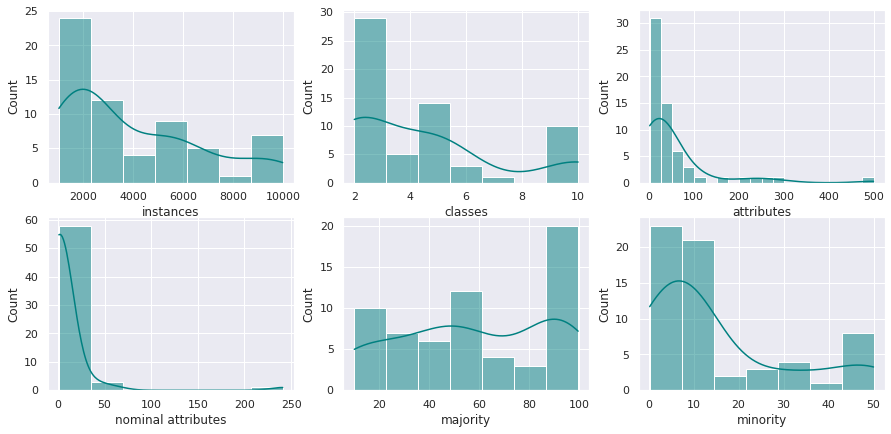

In [53]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = data

fig, axs = plt.subplots(2, 3, figsize=(15, 7))

sns.histplot(data=df, x="instances", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="classes", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="attributes", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="nominal attributes", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="majority", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="minority", kde=True, color="teal", ax=axs[1, 2])

plt.show()